In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Training.csv")


In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
df.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [5]:
disease = [df['prognosis'].unique()]

In [6]:
len(df['prognosis'].unique())

41

In [7]:
# number of rows and columns in the dataset
df.shape

(4920, 133)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [9]:
# checking for missing values
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [10]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df['prognosis'].value_counts()

Hepatitis C                                120
Bronchial Asthma                           120
AIDS                                       120
Heart attack                               120
Drug Reaction                              120
Dimorphic hemmorhoids(piles)               120
Tuberculosis                               120
Allergy                                    120
Hypertension                               120
Pneumonia                                  120
Dengue                                     120
Jaundice                                   120
(vertigo) Paroymsal  Positional Vertigo    120
Arthritis                                  120
Paralysis (brain hemorrhage)               120
Osteoarthristis                            120
Hepatitis E                                120
Acne                                       120
Impetigo                                   120
Fungal infection                           120
Malaria                                    120
Chicken pox  

In [12]:
X = df.drop(columns='prognosis', axis=1)
Y = df['prognosis']

In [13]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [14]:
Y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [16]:
ordered_features= SelectKBest(score_func=chi2,k=132)
ordered_fea= ordered_features.fit(X,Y)

In [17]:
dfscores = pd.DataFrame(ordered_fea.scores_,columns=["Score"])
dfcolumns = pd.DataFrame(X.columns)

In [18]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [19]:
features_rank.columns=['Features','Score']
features_rank.nlargest(132,'Score')

,Features,Score
54,runny_nose,4800.000000
52,redness_of_eyes,4800.000000
111,receiving_blood_transfusion,4800.000000
112,receiving_unsterile_injections,4800.000000
55,congestion,4800.000000
...,...,...
34,nausea,3553.759162
31,headache,3519.174603
25,high_fever,3296.828194
14,fatigue,2729.776398


In [20]:
features_rank.columns=['Features','Score']
remove = features_rank.nsmallest(25,'Score')

In [21]:
remove

,Features,Score
11,vomiting,2704.476489
14,fatigue,2729.776398
25,high_fever,3296.828194
31,headache,3519.174603
34,nausea,3553.759162
35,loss_of_appetite,3575.812500
39,abdominal_pain,3670.604651
32,yellowish_skin,3762.000000
1,skin_rash,3820.396947
5,chills,3879.699248


In [22]:
X.drop(remove.Features.values,axis=1,inplace=True)
X.columns.values

array(['nodal_skin_eruptions', 'continuous_sneezing', 'shivering',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'spotting_ urination', 'weight_gain', 'anxiety',
       'cold_hands_and_feets', 'mood_swings', 'restlessness',
       'patches_in_throat', 'irregular_sugar_level', 'sunken_eyes',
       'dehydration', 'indigestion', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'mild_fever', 'yellow_urine',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressure',
       'runny_nose', 'congestion', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements', 'pain_in_anal_region',
       'bloody_stool', 'irritation_in_anus', 'neck_pain', 'cramps',
       'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels',
       'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails'

In [23]:
l1=['nodal_skin_eruptions', 'continuous_sneezing', 'shivering',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'spotting_ urination', 'weight_gain', 'anxiety',
       'cold_hands_and_feets', 'mood_swings', 'restlessness',
       'patches_in_throat', 'irregular_sugar_level', 'sunken_eyes',
       'dehydration', 'indigestion', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'mild_fever', 'yellow_urine',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressure',
       'runny_nose', 'congestion', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements', 'pain_in_anal_region',
       'bloody_stool', 'irritation_in_anus', 'neck_pain', 'cramps',
       'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels',
       'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails',
       'swollen_extremeties', 'excessive_hunger',
       'extra_marital_contacts', 'drying_and_tingling_lips',
       'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness',
       'stiff_neck', 'swelling_joints', 'movement_stiffness',
       'spinning_movements', 'loss_of_balance', 'unsteadiness',
       'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort',
       'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching',
       'toxic_look_(typhos)', 'depression', 'irritability', 'muscle_pain',
       'altered_sensorium', 'red_spots_over_body', 'belly_pain',
       'abnormal_menstruation', 'dischromic _patches',
       'watering_from_eyes', 'increased_appetite', 'polyuria',
       'family_history', 'mucoid_sputum', 'rusty_sputum',
       'lack_of_concentration', 'visual_disturbances',
       'receiving_blood_transfusion', 'receiving_unsterile_injections',
       'coma', 'stomach_bleeding', 'distention_of_abdomen',
       'history_of_alcohol_consumption', 'fluid_overload.1',
       'blood_in_sputum', 'prominent_veins_on_calf', 'palpitations',
       'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring',
       'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails',
       'inflammatory_nails', 'blister', 'red_sore_around_nose',
       'yellow_crust_ooze']

In [62]:
len(l1)

107

In [24]:
disease=['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']

#disease = [df['prognosis'].unique()]
#print(disease)

In [25]:
len(disease)

41

In [26]:
l2=[]
for i in range(0,len(l1)):
    l2.append(0)
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [27]:
DF= pd.read_csv('Training.csv', index_col='prognosis')

df.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
#df.head()
DF.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
Fungal infection,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X= df[l1]
y = df[["prognosis"]]
np.ravel(y)
print(X)

      nodal_skin_eruptions  continuous_sneezing  shivering  stomach_pain  \
0                        1                    0          0             0   
1                        1                    0          0             0   
2                        1                    0          0             0   
3                        0                    0          0             0   
4                        1                    0          0             0   
...                    ...                  ...        ...           ...   
4915                     0                    0          0             0   
4916                     0                    0          0             0   
4917                     0                    0          0             0   
4918                     0                    0          0             0   
4919                     0                    0          0             0   

      acidity  ulcers_on_tongue  muscle_wasting  spotting_ urination  \
0           0  

In [29]:
X

,nodal_skin_eruptions,continuous_sneezing,shivering,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,spotting_ urination,weight_gain,anxiety,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [30]:
from sklearn import tree
clf3 = tree.DecisionTreeClassifier() 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
clf3 = clf3.fit(X,y)
from sklearn.metrics import accuracy_score
y_pred=clf3.predict(X_test)
print("Decision Tree")
print("Accuracy")
#pickle.dump(clf3,open("DT1.pkl","wb"))
print(accuracy_score(y_test, y_pred))


Decision Tree
Accuracy
0.9186991869918699


In [31]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(n_estimators=50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)
clf4 = clf4.fit(X,np.ravel(y))

# calculating accuracy 
from sklearn.metrics import accuracy_score
y_pred=clf4.predict(X_test)
print("Random Forest")
print("Accuracy")
#pickle.dump(clf4,open("RF1.pkl","wb"))
print(accuracy_score(y_test, y_pred))

Random Forest
Accuracy
0.9342818428184282


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression()
logreg.fit(X_train,np.ravel(y_train))
y_pred=logreg.predict(X_test)
print("Logistic Regression")
print("Accuracy")
#pickle.dump(logreg,open("LR1.pkl","wb"))
print(accuracy_score(y_test, y_pred))

Logistic Regression
Accuracy
0.9193766937669376


In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb=gnb.fit(X,np.ravel(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
from sklearn.metrics import accuracy_score
y_pred=gnb.predict(X_test)
print("Naive Bayes")
print("Accuracy")
#pickle.dump(gnb,open("NB1.pkl","wb"))
print(accuracy_score(y_test, y_pred))



Naive Bayes
Accuracy
0.926829268292683


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn=knn.fit(X,np.ravel(y))

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=knn.predict(X_test)
print("kNearest Neighbour")
print("Accuracy")
print(accuracy_score(y_test, y_pred))
#pickle.dump(knn,open("KN1.pkl","wb"))


kNearest Neighbour
Accuracy
0.9247967479674797


In [35]:
#Ensembler

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble  import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,VotingClassifier
# bg = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=48)
# bg.fit(X_train,np.ravel(y_train))

In [37]:
# bg.score(X_test,y_test)

In [38]:
# Boosting
# adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=10,learning_rate=1)
# adb.fit(X_train,y_train)
# adb.score(X_test,y_test)


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
from sklearn.svm import SVC

In [41]:
# Voting  Classifier -- Multiple Model Ensemble
from sklearn. ensemble  import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,VotingClassifier
LogReg_clf = LogisticRegression()
RandomForest_clf = RandomForestClassifier()
KNN_clf = KNeighborsClassifier()


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
LogReg_clf.fit(X_train, np.ravel(y_train))

LogisticRegression()

In [43]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# DTree_clf.fit(X_train,np.ravel(y_train))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
RandomForest_clf.fit(X_train,np.ravel(y_train))

RandomForestClassifier()

In [45]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# SVC_clf.fit(X_train,np.ravel(y_train))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
KNN_clf.fit(X_train,np.ravel(y_train))

KNeighborsClassifier()

In [47]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# NB_clf.fit(X_train,np.ravel(y_train))

In [48]:
estimators = [('lr',LogReg_clf),('rf',RandomForest_clf),('knn',KNN_clf)]

In [49]:
voting_clf = VotingClassifier(estimators=estimators, voting='hard')
vclf=voting_clf.fit(X_train,np.ravel(y_train))
preds = voting_clf.predict(X_test)
acc = accuracy_score(y_test, preds)
#pickle.dump(vclf,open("ENSHard.pkl","wb"))
print("------------ENSEMBLE HARD VOTING-------------")
print("Accuracy")
print(round(acc,2))

------------ENSEMBLE HARD VOTING-------------
Accuracy
0.92


In [50]:
voting_clf = VotingClassifier(estimators=estimators, voting='soft')
vc=voting_clf.fit(X_train,np.ravel(y_train))
preds = voting_clf.predict(X_test)
acc = accuracy_score(y_test, preds)
#pickle.dump(vclf,open("ENSSoft.pkl","wb"))
vc1 = VotingClassifier(estimators=estimators,voting='soft')
print("------------ENSEMBLE SOFT VOTING-------------")
print("Accuracy")
print(round(acc,2))


------------ENSEMBLE SOFT VOTING-------------
Accuracy
0.92


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [52]:
scaler.fit(X)


StandardScaler()

In [53]:
scaled_features = scaler.transform(X)


In [54]:
df_feat = pd.DataFrame(scaled_features,columns=l1)


In [55]:
import seaborn as sns

sns.pairplot(df,hue='prognosis')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C73B5FB820> (for post_execute):


KeyboardInterrupt: 

In [56]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
print(confusion_matrix(y_test,y_pred))


[[0 0 0 ... 0 2 2]
 [0 2 1 ... 0 0 2]
 [0 0 0 ... 1 2 2]
 ...
 [0 1 3 ... 1 0 0]
 [1 0 1 ... 1 0 2]
 [0 1 2 ... 2 0 1]]


In [57]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.06      0.07      0.07        27
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        44
           4       0.00      0.00      0.00        39
           5       0.05      0.05      0.05        44
           6       0.04      0.06      0.05        35
           7       0.03      0.03      0.03        34
           8       0.08      0.05      0.06        37
           9       0.04      0.02      0.03        47
          10       0.02      0.03      0.03        31
          11       0.05      0.06      0.06        31
          12       0.06      0.05      0.05        37
          13       0.00      0.00      0.00        33
          14       0.00      0.00      0.00        34
          15       0.04      0.02      0.03        41
          16       0.00      0.00      0.00        37
          17       0.00    

C:\Users\Rhyth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rhyth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rhyth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,np.ravel(y),cv=10)
    accuracy_rate.append(score.mean())


In [59]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,np.ravel(y),cv=10)
    error_rate.append(1-score.mean())

In [60]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,np.ravel(y))
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != np.ravel(y_pred)))


Text(0, 0.5, 'Error Rate')

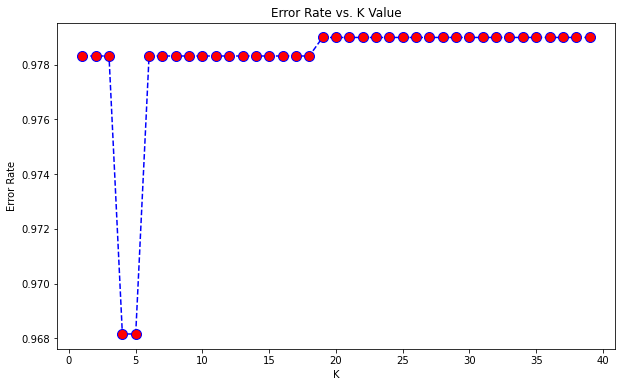

In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')